

# Project: Investigate aTMDb-Movies Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I used Tmdb movies dataset to analsye and investigate data 

QUESTIONS

From when Women centered movies are made?<br>
Which film has made the most money ever?<br>
Which genre of movies has been relatively preferred over the years?<br>
who are the most prefered Actors and Directors Before & After 2000?<br>
What are the top successfull movies with respect to runtime before and after 2000?<br>




In [165]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sb
%matplotlib inline

#set ggplot style
plot.style.use('ggplot')


In [166]:
t_data = pd.read_csv("movies.csv")
t_data.shape

(10866, 21)

<a id='wrangling'></a>
## Data Wrangling

checking for cleanliness, and then trimming,cleaning dataset for analysis
### General Properties

In [167]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances odata = pds.read_csv("titanic-data.csv")f missing or possibly errant dat
tdata = pd.read_csv("movies.csv")
tdata.shape

(10866, 21)

In [168]:
tdata.head(2)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   

                        homepage         director             tagline  \
0  http://www.jurassicworld.com/  Colin Trevorrow   The park is open.   
1    http://www.madmaxmovie.com/    George Miller  What a Lovely Day.   

       ...                                                overview runtime  \
0      ...       Twenty-two years after the events of Jurassic ...     124   
1      ...       An apocalyptic story set in the furthest reach...     120   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  

[2 rows x 21 columns]

OBSERVATION


Given dataset contains 21 columns where currency has no unit.


In [169]:
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleansing

Removing unused columns

In [170]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
delcol=['id','imdb_id','homepage','tagline','overview','budget_adj','revenue_adj']
tdata=tdata.drop(delcol,axis=1)
tdata.head(2)


popularity     budget     revenue      original_title  \
0   32.985763  150000000  1513528810      Jurassic World   
1   28.419936  150000000   378436354  Mad Max: Fury Road   

                                                cast         director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...    George Miller   

                                            keywords  runtime  \
0  monster|dna|tyrannosaurus rex|velociraptor|island      124   
1   future|chase|post-apocalyptic|dystopia|australia      120   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   

   vote_average  release_year  
0           6.5          2015  
1           7.1          2015

Removing Duplicates

In [171]:
tdata.drop_duplicates(keep ='first', inplace=True)

In [172]:
 tdata.shape

(10865, 14)

Detect Missing values

In [173]:
tdata.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

Replacing zero with NAN and Dropping the rows contains NAN

In [174]:

# creating a seperate list 
temp=['budget', 'revenue','keywords','director']
tdata[temp] = tdata[temp].replace(0, np.NAN) 
tdata.dropna(subset = temp, inplace = True)
tdata.shape




(3716, 14)

Change format of release_date

In [175]:
tdata.release_date = pd.to_datetime(tdata['release_date'])
tdata.head(2)

popularity       budget       revenue      original_title  \
0   32.985763  150000000.0  1.513529e+09      Jurassic World   
1   28.419936  150000000.0  3.784364e+08  Mad Max: Fury Road   

                                                cast         director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...    George Miller   

                                            keywords  runtime  \
0  monster|dna|tyrannosaurus rex|velociraptor|island      124   
1   future|chase|post-apocalyptic|dystopia|australia      120   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13        6185   

   vote_average  release_year  
0           6.5          2015  
1           7.1          2015

<a id='eda'></a>
## Exploratory Data Analysis


### Trend of Women Centered Movies

In [176]:
tdata[tdata['keywords'].str.match('women','feminism')]

popularity      budget      revenue      original_title  \
1561    0.534693   3000000.0      18097.0    Women in Trouble   
1982    1.146440  10000000.0    2995811.0        The Runaways   
2678    0.945429  42000000.0   35402320.0        Original Sin   
5468    1.765514   5000000.0   55198285.0  Dallas Buyers Club   
7397    2.400727  25000000.0   25037897.0         Death Proof   
8670    1.767681  70000000.0  374111707.0     What Women Want   

                                                   cast             director  \
1561  Carla Gugino|Adrianne Palicki|Connie Britton|M...  Sebastian Gutierrez   
1982  Dakota Fanning|Kristen Stewart|Michael Shannon...    Floria Sigismondi   
2678  Angelina Jolie|Antonio Banderas|Gregory Itzin|...    Michael Cristofer   
5468  Matthew McConaughey|Jennifer Garner|Jared Leto...    Jean-Marc VallÃ©e   
7397  Kurt Russell|ZoÃ« Bell|Rosario Dawson|Vanessa ...    Quentin Tarantino   
8670  Helen Hunt|Mel Gibson|Marisa Tomei|Lauren Holl...         Nancy Meyers   

                                               keywords  runtime  \
1561    women|infidelity|stewardess|aftercreditsstinger       92   
1982                   women|1970s|publicity|iron|music      106   
2678            women|sex|cuba|eroticism|lover (female)      118   
5468       women|aids|biography|based on true story|hiv      117   
7397        women|disc jockey|sports car|bar|ladykiller      113   
8670  women|telepathy|supernatural powers|advertisin...      127   

                              genres  \
1561                    Comedy|Drama   
1982                     Drama|Music   
2678  Drama|Thriller|Mystery|Romance   
5468                   Drama|History   
7397                 Action|Thriller   
8670                  Comedy|Romance   

                                   production_companies release_date  \
1561                                   Gato Negro Films   2009-11-13   
1982  River Road Entertainment|Road Rebel|Linson Ent...   2010-03-19   
2678                          Metro-Goldwyn-Mayer (MGM)   2001-08-03   
5468  Universal Studios|Universal Pictures|Voltage P...   2013-09-07   
7397  The Weinstein Company|Dimension Films|Troublem...   2007-05-21   
8670  Paramount Pictures|Centropolis Entertainment|I...   2000-12-14   

      vote_count  vote_average  release_year  
1561          11           4.5          2009  
1982         133           6.3          2010  
2678         115           5.8          2001  
5468        1831           7.8          2013  
7397         720           6.7          2007  
8670         576           6.0          2000

Female centric movies has been directed and released from the year 2000. It indicates a paradigm shift for women in American Film society.

In [177]:
#Inserting profit column(profit=revenue-budget)
tdata.insert(1,'profit',tdata['revenue']-tdata['budget'])
tdata.head(2)

popularity        profit       budget       revenue      original_title  \
0   32.985763  1.363529e+09  150000000.0  1.513529e+09      Jurassic World   
1   28.419936  2.284364e+08  150000000.0  3.784364e+08  Mad Max: Fury Road   

                                                cast         director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...    George Miller   

                                            keywords  runtime  \
0  monster|dna|tyrannosaurus rex|velociraptor|island      124   
1   future|chase|post-apocalyptic|dystopia|australia      120   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13        6185   

   vote_average  release_year  
0           6.5          2015  
1           7.1          2015




### Highest Profit

In [178]:
# High profit
high_profit=tdata['profit'].idxmax()
high_details=pd.DataFrame(tdata.loc[high_profit])
print(high_details)


                                                                   1386
popularity                                                      9.43277
profit                                                      2.54451e+09
budget                                                         2.37e+08
revenue                                                     2.78151e+09
original_title                                                   Avatar
cast                  Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                                  James Cameron
keywords              culture clash|future|space war|space colony|so...
runtime                                                             162
genres                         Action|Adventure|Fantasy|Science Fiction
production_companies  Ingenious Film Partners|Twentieth Century Fox ...
release_date                                        2009-12-10 00:00:00
vote_count                                                      

Avatar is the highest grossing movie of all time


### HIGHEST FREQUENCY OF GENRE

A movie is considered to be hit if it gains two times the budjet.Implementing this logic below using the profit that has been calculated already<br>
Profit=revenue-budjet<br>
profit must be greater than budget if its revenue is two times the budjet

In [179]:
blockbusters=tdata[tdata['profit']>=tdata['budget']]
#reindex
blockbusters.index = range(len(blockbusters))
#printing the changed dataset
blockbusters.head(3)
len(blockbusters)

1976

In [180]:
#function
def cdata(column):
    data = blockbusters[column].str.cat(sep = '|')
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    
    return count

In [181]:
count=cdata('genres')
count.head(5)

Drama        816
Comedy       708
Thriller     597
Action       541
Adventure    400
dtype: int64

# Successful genre before 2000

In [182]:
before2000=blockbusters[blockbusters['release_year'] < 2000]
#reindex
before2000.index = range(len(before2000))
#printing the changed dataset
before2000.head(3)
len(before2000)

786

In [183]:
def adata(column):
    data = before2000[column].str.cat(sep = '|')
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    
    return count

In [184]:
count=adata('genres')
count.head(5)

Drama        345
Comedy       269
Thriller     264
Action       230
Adventure    166
dtype: int64

# successfull genre after 2000

In [185]:
after2000=blockbusters[blockbusters['release_year'] >= 2000]
#reindex
after2000.index = range(len(after2000))
#printing the changed dataset
after2000.head(3)
len(after2000)

1190

In [186]:
def bdata(column):
    data = after2000[column].str.cat(sep = '|')
    data = pd.Series(data.split('|'))
    count = data.value_counts(ascending = False)
    
    return count

In [187]:
count=bdata('genres')
count.head(5)

Drama        471
Comedy       439
Thriller     333
Action       311
Adventure    234
dtype: int64

# The cast who increases Success of the movie before 2000

In [188]:
count=adata('cast')
count.head(5)

Sean Connery      17
Tom Hanks         16
Robert De Niro    15
Gene Hackman      15
Clint Eastwood    15
dtype: int64

# The cast who increases Success of the movie after 2000

In [189]:
count=bdata('cast')
count.head(5)

Ben Stiller      18
Anne Hathaway    17
Brad Pitt        17
Mark Wahlberg    16
Cameron Diaz     16
dtype: int64

# The Most Successful & Powerful Filmmakers before 2000

In [190]:
count=adata('director')
count.head(5)

Steven Spielberg        16
Clint Eastwood           9
John Landis              8
Francis Ford Coppola     8
Richard Donner           7
dtype: int64

# The Most Successfull & Powerful Filmmakers after 2000

In [191]:
count=bdata('director')
count.head(5)

Steven Spielberg     10
Shawn Levy            9
Steven Soderbergh     8
Clint Eastwood        8
Christopher Nolan     8
dtype: int64

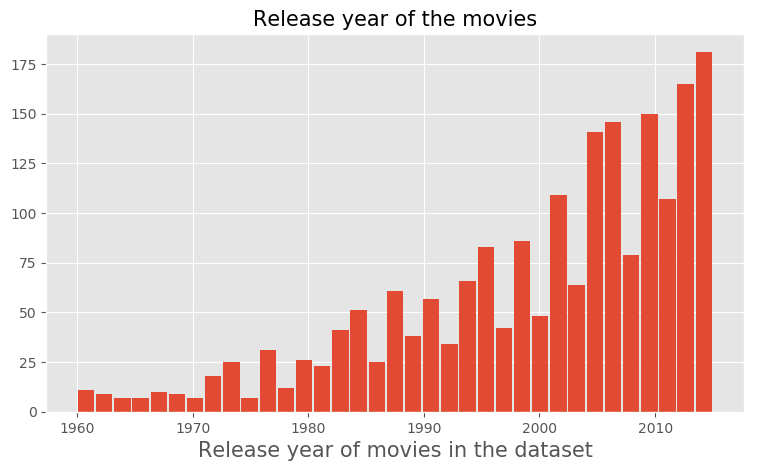

In [192]:
#plotting a histogram of runtime of movies

#giving the figure size(width, height)
plot.figure(figsize=(9,5), dpi = 100)

#On x-axis 
plot.xlabel('Release year of movies in the dataset', fontsize = 15)

#Name of the graph
plot.title('Release year of the movies', fontsize=15)

#giving a histogram plot
plot.hist(blockbusters['release_year'], rwidth = 0.9, bins =35)
#displays the plot
plot.show()

X axis represents the release year of the movies.
This graph clearly depicts that No of movies increased gradually through the years.

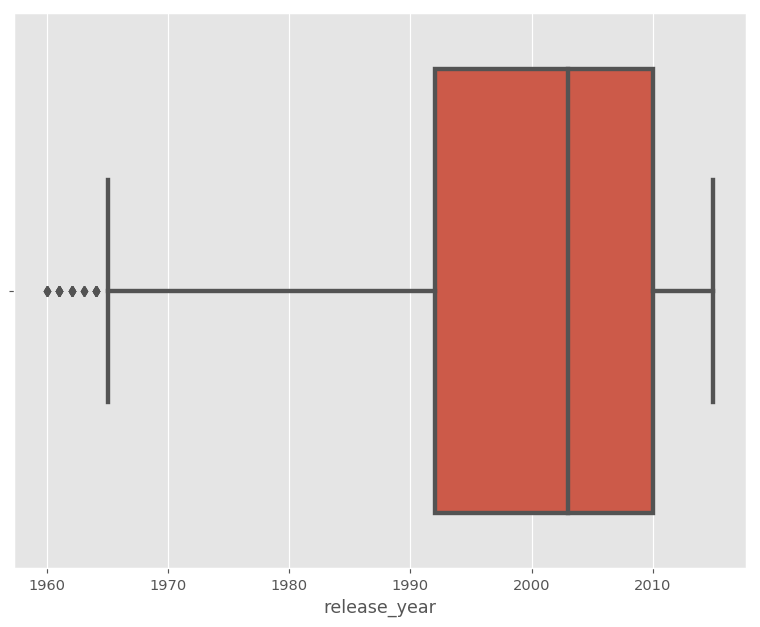

In [193]:
#The First plot is box plot of the runtime of the movies 
plot.figure(figsize=(9,7), dpi = 105)

#using seaborn to generate the boxplot
sb.boxplot(blockbusters['release_year'], linewidth = 3)
#diplaying the plot
plot.show()

X axis represents the release year of the movies. From the above graph we found that there are 5 outlier points in the graph and this graph is skewed to the left

# Successfull movies with respect to runtime before 2000

In [194]:
blockbusters[(blockbusters.release_year < 2000 )].sort_values(by=['runtime'],ascending=False).head()

popularity       profit      budget      revenue  \
1782    1.168767   55000000.0  15000000.0   70000000.0   
1761    3.264571   34542841.0  13000000.0   47542841.0   
1843    1.136943   48000000.0  12000000.0   60000000.0   
1956    1.282053   97721910.0  14000000.0  111721910.0   
1861    2.377288  299265768.0  22000000.0  321265768.0   

              original_title  \
1782      Lawrence of Arabia   
1761  The Godfather: Part II   
1843               Spartacus   
1956          Doctor Zhivago   
1861        Schindler's List   

                                                   cast              director  \
1782  Peter O'Toole|Alec Guinness|Anthony Quinn|Jack...            David Lean   
1761  Al Pacino|Robert Duvall|Diane Keaton|Robert De...  Francis Ford Coppola   
1843  Kirk Douglas|Laurence Olivier|Jean Simmons|Cha...       Stanley Kubrick   
1956  Omar Sharif|Julie Christie|Geraldine Chaplin|R...            David Lean   
1861  Liam Neeson|Ben Kingsley|Ralph Fiennes|Carolin...      Steven Spielberg   

                                               keywords  runtime  \
1782          cairo|arabian|world war i|horse|jerusalem      216   
1761      italo-american|cuba|vororte|melancholy|praise      200   
1843  gladiator|roman empire|gladiator fight|slavery...      197   
1956  love triangle|nurse|suicide attempt|loss of fa...      197   
1861  factory|concentration camp|hero|holocaust|worl...      195   

                           genres                     production_companies  \
1782  Adventure|Drama|History|War                    Horizon Pictures (II)   
1761                  Drama|Crime   Paramount Pictures|The Coppola Company   
1843         Action|Drama|History                        Bryna Productions   
1956            Drama|Romance|War                Metro-Goldwyn-Mayer (MGM)   
1861            Drama|History|War  Universal Pictures|Amblin Entertainment   

     release_date  vote_count  vote_average  release_year  
1782   2062-12-10         517           7.5          1962  
1761   1974-12-20        2131           8.1          1974  
1843   2060-10-06         211           6.9          1960  
1956   2065-12-22         126           6.9          1965  
1861   1993-11-29        2632           8.1          1993

# # Successfull movies with respect to runtime after 2000

In [195]:
blockbusters[(blockbusters.release_year >= 2000 )].sort_values(by=['runtime'],ascending=False).head()

popularity        profit       budget       revenue  \
792     7.122455  1.024889e+09   94000000.0  1.118889e+09   
1034    1.508329  3.430000e+08  207000000.0  5.500000e+08   
400     2.478879  3.092209e+08  140000000.0  4.492209e+08   
521     0.215030  6.690000e+07    9100000.0  7.600000e+07   
903     4.877927  2.920007e+08  100000000.0  3.920007e+08   

                                     original_title  \
792   The Lord of the Rings: The Return of the King   
1034                                      King Kong   
400                                    Pearl Harbor   
521                                         Ghajini   
903                         The Wolf of Wall Street   

                                                   cast         director  \
792   Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...    Peter Jackson   
1034  Naomi Watts|Jack Black|Adrien Brody|Thomas Kre...    Peter Jackson   
400   Ben Affleck|Josh Hartnett|Kate Beckinsale|Cuba...      Michael Bay   
521   Aamir Khan|Asin Thottumkal|Jiah Khan|Pradeep R...  A.R. Murugadoss   
903   Leonardo DiCaprio|Jonah Hill|Margot Robbie|Kyl...  Martin Scorsese   

                                               keywords  runtime  \
792   elves|orcs|middle-earth (tolkien)|based on nov...      201   
1034  film business|screenplay|show business|film ma...      187   
400          nurse|patriotism|hawaii|world war ii|pilot      183   
521                            tattoo|short-term memory      183   
903                 corruption|sex|sexuality|bank|humor      180   

                                     genres  \
792                Adventure|Fantasy|Action   
1034                 Adventure|Drama|Action   
400                     History|Romance|War   
521   Action|Drama|Foreign|Mystery|Thriller   
903                      Crime|Drama|Comedy   

                                   production_companies release_date  \
792                       WingNut Films|New Line Cinema   2003-12-01   
1034  WingNut Films|Universal Pictures|Big Primate P...   2005-12-14   
400         Jerry Bruckheimer Films|Touchstone Pictures   2001-05-21   
521                                                 NaN   2008-12-25   
903   Paramount Pictures|Appian Way|EMJAG Production...   2013-12-25   

      vote_count  vote_average  release_year  
792         5636           7.9          2003  
1034        1289           6.4          2005  
400         1044           6.6          2001  
521           53           6.9          2008  
903         4027           7.9          2013

### Successfull genres with respect to their profit before and after 2000

In [196]:
drama1=blockbusters[(blockbusters.release_year <= 2000) & (blockbusters.genres=='Drama') ]
drama2=blockbusters[(blockbusters.release_year > 2000 ) & (blockbusters.genres=='Drama')  ]
comedy1=blockbusters[(blockbusters.release_year <= 2000) & (blockbusters.genres=='Comedy') ]
comedy2=blockbusters[(blockbusters.release_year > 2000) & (blockbusters.genres=='Comedy') ]
action1=blockbusters[(blockbusters.release_year <= 2000) & (blockbusters.genres=='Action') ]
action2=blockbusters[(blockbusters.release_year > 2000) & (blockbusters.genres=='Action') ]
thriller1=blockbusters[(blockbusters.release_year <= 2000) & (blockbusters.genres=='Thriller') ]
thriller2=blockbusters[(blockbusters.release_year >= 2000) & (blockbusters.genres=='Thriller') ]



# Profitability of Drama Movies Before 2000 

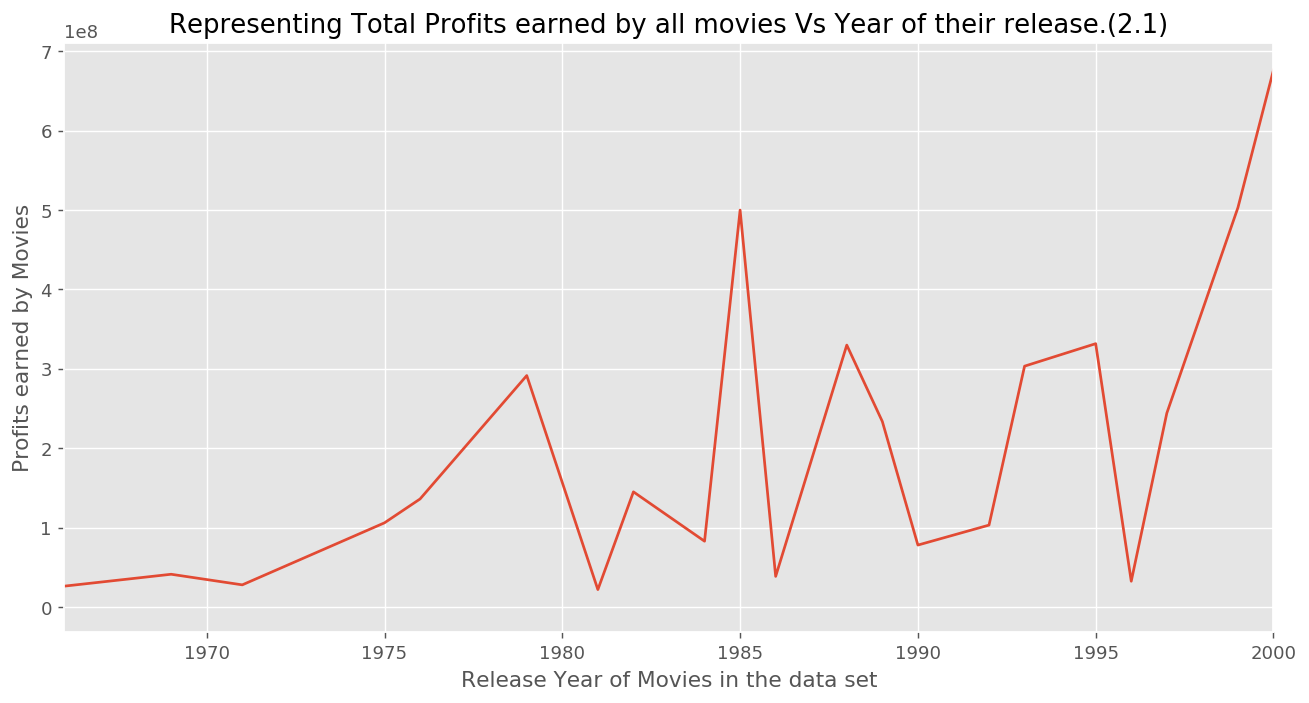

In [197]:
drama1_graph = drama1.groupby('release_year')['profit'].sum()

#figure size(width, height)
plot.figure(figsize=(12,6), dpi = 130)

#on x-axis
plot.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plot.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plot.title('Representing Total Profits earned by all movies Vs Year of their release.(2.1)')

#plotting the graph
plot.plot(drama1_graph)
#plot.xlim(1966 to 2000)
plot.xlim(1966,2000)
#plot.xlim(1966 to 2000)

#displaying the line plot
plot.show()


X axis represents the Release Year and Y axis represents the profits earned by the movies in particular year.
From the above graph we can deduce that the profits earned by the Movies after 1975 has risen slowly till 1985 and dropped gradually thereafter.

# Profitability of Drama movies after 2000

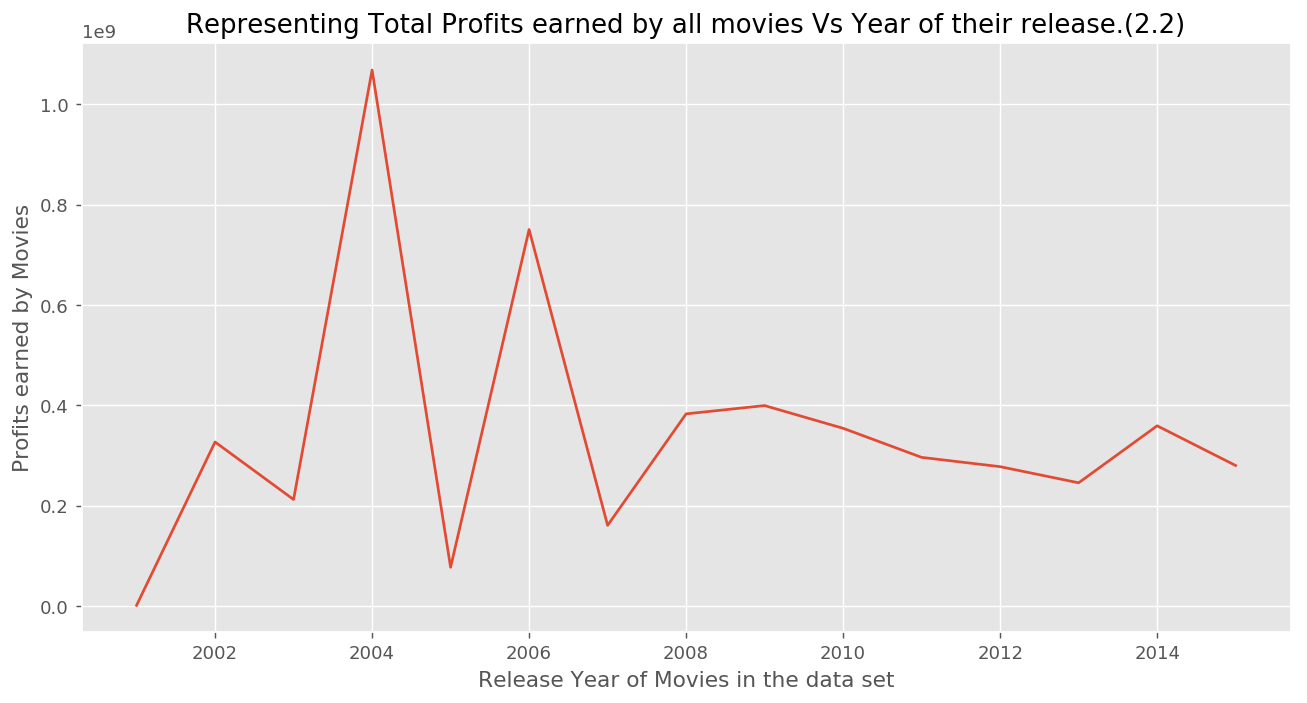

In [198]:
drama2_graph = drama2.groupby('release_year')['profit'].sum()

#figure size(width, height)
plot.figure(figsize=(12,6), dpi = 130)

#on x-axis
plot.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plot.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plot.title('Representing Total Profits earned by all movies Vs Year of their release.(2.2)')

#plotting the graph
plot.plot(drama2_graph)

#displaying the line plot
plot.show()

X axis represents the Release Year and Y axis represents the profits earned by the movies in particular year.
From the above graph we can deduce that growth has dropped gradually after 20066.
on comparing previous grapth we can conclude that movies made more profit from the year 2000 than before.

# Profitability of Comedy movies before 2000

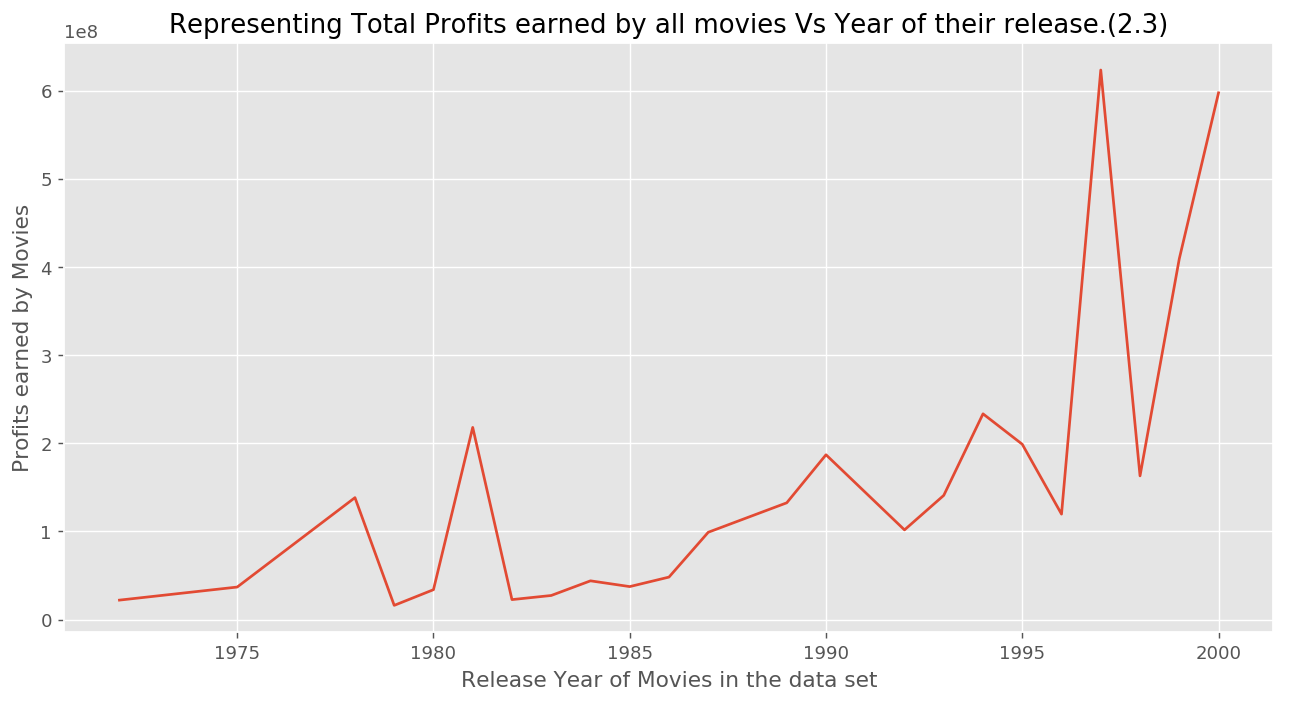

In [199]:
comedy1_graph = comedy1.groupby('release_year')['profit'].sum()

#figure size(width, height)
plot.figure(figsize=(12,6), dpi = 130)

#on x-axis
plot.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plot.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plot.title('Representing Total Profits earned by all movies Vs Year of their release.(2.3)')

#plotting the graph
plot.plot(comedy1_graph)

#displaying the line plot
plot.show()

# Profitability of Comedy movies after 2000

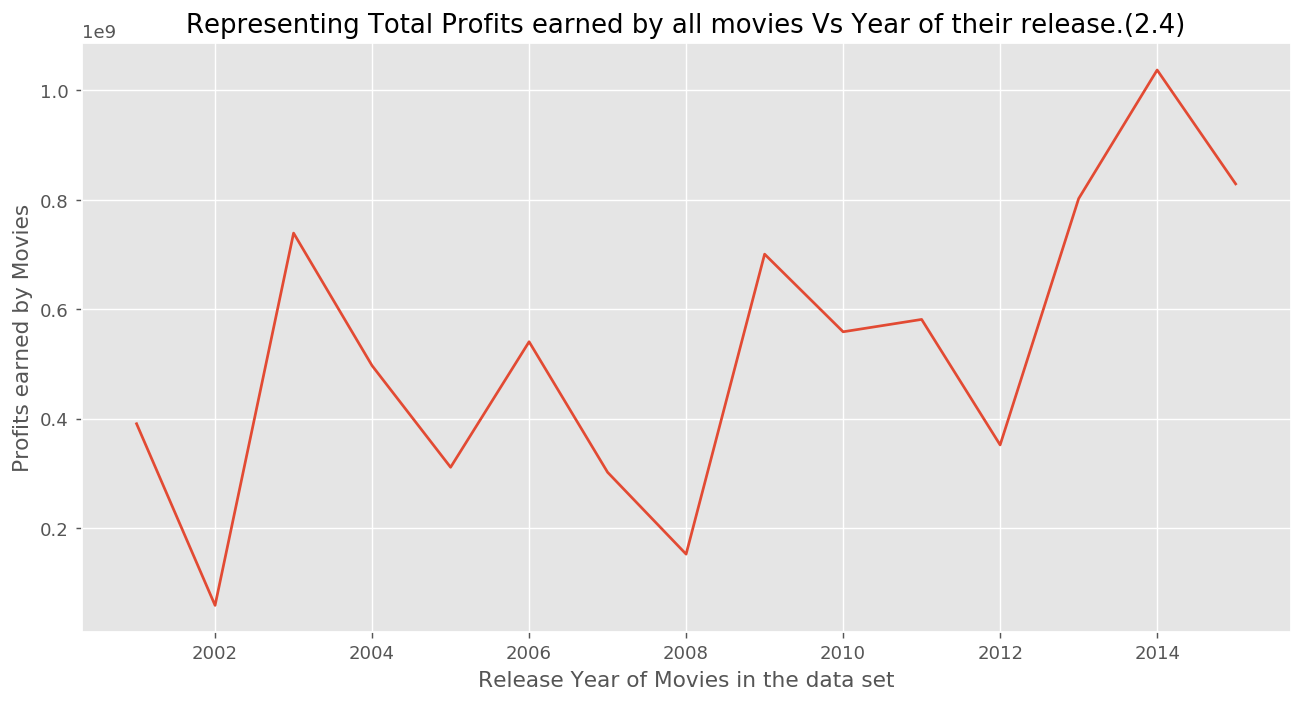

In [200]:
comedy2_graph = comedy2.groupby('release_year')['profit'].sum()

#figure size(width, height)
plot.figure(figsize=(12,6), dpi = 130)

#on x-axis
plot.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plot.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plot.title('Representing Total Profits earned by all movies Vs Year of their release.(2.4)')

#plotting the graph
plot.plot(comedy2_graph)

#displaying the line plot
plot.show()

# Profitability of Thriller movies before 2000

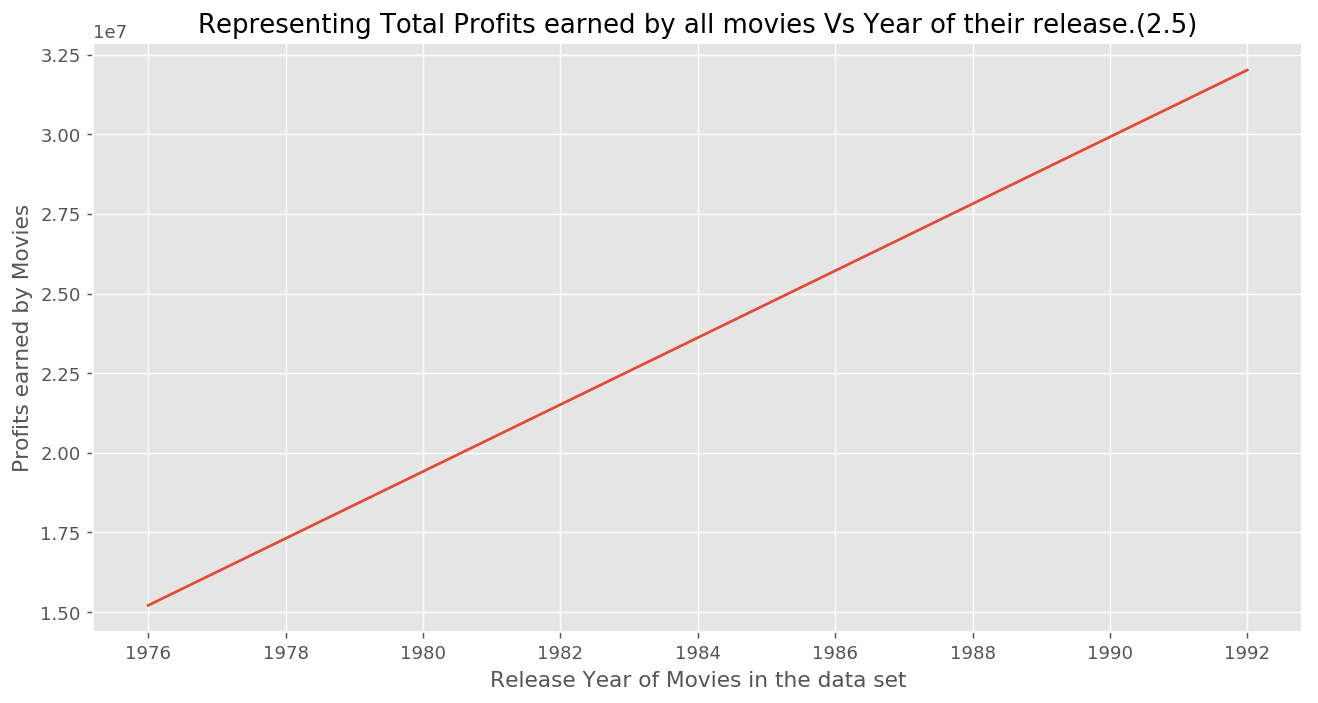

In [201]:
thriller1_graph = thriller1.groupby('release_year')['profit'].sum()

#figure size(width, height)
plot.figure(figsize=(12,6), dpi = 130)

#on x-axis
plot.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plot.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plot.title('Representing Total Profits earned by all movies Vs Year of their release.(2.5)')

#plotting the graph
plot.plot(thriller1_graph)

#displaying the line plot
plot.show()

X axis represents the Release Year and Y axis represents the profits earned by the movies in particular year.
It depicts that profit steadily has risen over the years.

# Profitability of Thriller movies after 2000

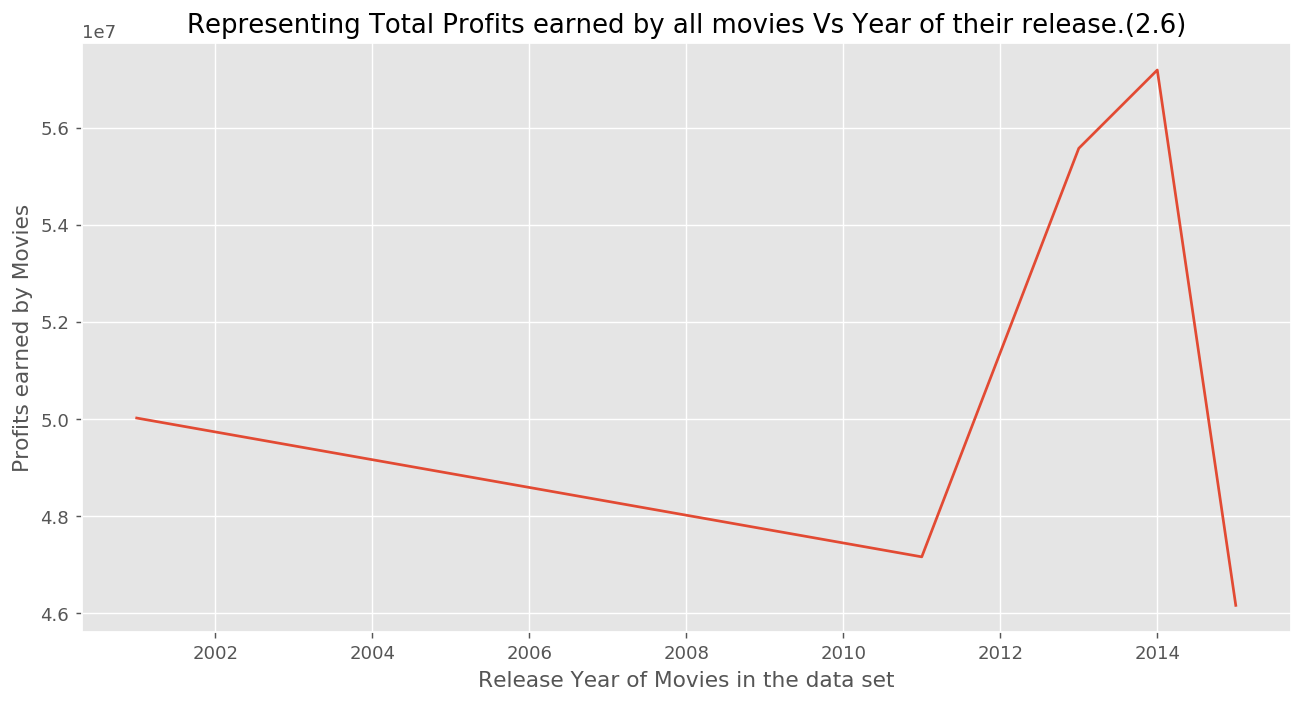

In [202]:
thriller2_graph = thriller2.groupby('release_year')['profit'].sum()

#figure size(width, height)
plot.figure(figsize=(12,6), dpi = 130)

#on x-axis
plot.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plot.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plot.title('Representing Total Profits earned by all movies Vs Year of their release.(2.6)')

#plotting the graph
plot.plot(thriller2_graph)

#displaying the line plot
plot.show()

# No of Successfull movies in Highest Frequency genre before 2000

In [203]:
# NO of Successful movies in the genre of Action,Adventure,Comedy before 2000
succ1=blockbusters[(blockbusters.release_year <= 2000) & (blockbusters['genres'].isin(['Action', 'Adventure', 'Comedy'])) ]

In [204]:
rows, col = succ1.shape
print(' Successfull no.of movies till 2000 in Action, Adventure,Comedy is {} .'.format(rows-1))


 Successfull no.of movies till 2000 in Action, Adventure,Comedy is 47 .


# No of Successfull movies in Highest Frequency genre after 2000

In [205]:
## NO of Successful movies in the genre of Action,Adventure,Comedy after 2000
succ2=blockbusters[(blockbusters.release_year > 2000) & (blockbusters['genres'].isin(['Action', 'Adventure', 'Comedy']))]

In [206]:
rows, col = succ2.shape
print(' Successfull  no.of movies after 2000 in Action, Adventure,Comedy is {} .'.format(rows-1))

 Successfull  no.of movies after 2000 in Action, Adventure,Comedy is 98 .


<a id='conclusions'></a>
## Conclusions
The era of feminism has begun in early 2000 and it has good impact in American movies. Consequently Women centric movies were released and created social awareness among people.
It also appears that current events can have an impact on public tastes when it comes to purchasing a movie ticket

No of movies released before 2000 is lesser than movies released from 2000

PROFIT COMPARISON<br>
Dramas and Comedies were consistently a sizable portion of the total movies made over the years examined,
but profit of the movies in the  Drama genre are slightly declining after 2007  despite the movies made in Comedy genre exhibit a gradual growth

SUCCESS CRITERIA <br>
A movie is most probably considered as successfull if it is directed and cast by preferred professionals as specified below, in the genre (Action,Adventure,Comedy).

cast<br>
Sean Connery      
Tom Hanks         
Gene Hackman      
Tom Cruise        
Clint Eastwood    

director<br>
Steven Spielberg     
Shawn Levy            
Clint Eastwood        
Christopher Nolan     
Steven Soderbergh               
Francis Ford Coppola     
John Landis              
Richard Donner           

The domination of the US box office by a narrow range of genres is also evident in the blockbuster movies before and after 2000 and in the top  grossing films with highest run rate. So the popular genres are Drama,Comedy,Action,Thriller

LIMITATIONS<br>
The given dataset has no unit for currency. It makes it difficult to rationalize the profit earned by the movies from different region in th world.

Above conclusions may increase the probability of success but cannot assure success.

We cannot compare the success of the movies before 2000 with the movies released after 2000. because exposure ,technology, Currency exchange are absolutely different and more advanced after 2000.
